In [ ]:
# Import class for data manipulation and analysis
import pandas as pd
import numpy as np

# Import class for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import class for prepocessing and model evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Import class for machine learning model
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier



In [5]:
!wget "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls" -O default_credit_card.xls


--2025-07-23 13:53:19--  https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘default_credit_card.xls’

default_credit_card     [    <=>             ]   5.28M  7.70MB/s    in 0.7s    

2025-07-23 13:53:21 (7.70 MB/s) - ‘default_credit_card.xls’ saved [5539328]



In [73]:
df = pd.read_excel('default_credit_card.xls', header=1, index_col=0)

df.rename(columns={'default payment next month': 'default'}, inplace=True) # Rename the target column for clarity
df['default'] = df['default'].astype(int) # Convert the target variable to integer data type
col = df.columns.tolist() # Get the list of columns
df.columns = [c.lower() for c in col] # Update the DataFrame with lowercase column names
df.rename(columns={'pay_0': 'pay_1'}, inplace=True)
df.head(20)


,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
9,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0


| Variable | Name / Description                                                       | Type           | Values / Notes                                                                 |
|----------|---------------------------------------------------------------------------|----------------|--------------------------------------------------------------------------------|
| Y        | Default Payment Next Month                                               | Binary Target  | 0 = No, 1 = Yes                                                                 |
| limit_bal       | Amount of given credit (NT$)                                             | Numeric        | Includes personal and supplementary credit                                     |
| sex       | Gender                                                                   | Categorical    | 1 = Male, 2 = Female                                                            |
| education       | Education Level                                                          | Categorical    | 1 = Graduate School, 2 = University, 3 = High School, 4 = Others               |
| marriage       | Marital Status                                                           | Categorical    | 1 = Married, 2 = Single, 3 = Others                                             |
| age       | Age (years)                                                              | Numeric        | Age in full years                                                              |
| pay_1 – pay_6   | Repayment status over the last 6 months(1 = most recent month, 6 = 6th month)                                          | Ordinal        | -1 = Pay duly, 1 = payment delay for 1 month, ..., 6 = payment delay for 6+ month                     |
| bill_amt1 – bill_amt6  | Amount of billing statement over the last 6 months (1 = most recent month, 6 = 6th month)                                  | Numeric        | Monthly bill amount (NT$)                                                      |
| pay_amt1 – pay_amt6  | Payment amount of previous payment over the last 6 months (1 = most recent month, 6 = 6th month)                              | Numeric        | Amount paid toward bills (NT$)                                                 |


***
# Data Pre-Processing
***

In [74]:
# Setting all payments marked with -1 or less to 0. 
# Since a payment categorized as 'Pay Duly' means that the payment was made on time
# Therefore the client is 0 months late
for num in range(1, 7):
    df[f'pay_{num}'] = df[f'pay_{num}'].apply(lambda x: 0 if x <= -1 else x)

In [75]:
# Setting the bill statement amount to 0 if it is less than or equal to -1
# This is because a bill statement amount of -1 or less indicates no bill was generated
for num in range(1, 7):
    df[f'bill_amt{num}'] = df[f'bill_amt{num}'].apply(lambda x: 0 if x <= -1 else x)

***
# Exploratory Data Analysis
***

In [79]:
# Checking the data types of each column and the number of non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   limit_bal  30000 non-null  int64
 1   sex        30000 non-null  int64
 2   education  30000 non-null  int64
 3   marriage   30000 non-null  int64
 4   age        30000 non-null  int64
 5   pay_1      30000 non-null  int64
 6   pay_2      30000 non-null  int64
 7   pay_3      30000 non-null  int64
 8   pay_4      30000 non-null  int64
 9   pay_5      30000 non-null  int64
 10  pay_6      30000 non-null  int64
 11  bill_amt1  30000 non-null  int64
 12  bill_amt2  30000 non-null  int64
 13  bill_amt3  30000 non-null  int64
 14  bill_amt4  30000 non-null  int64
 15  bill_amt5  30000 non-null  int64
 16  bill_amt6  30000 non-null  int64
 17  pay_amt1   30000 non-null  int64
 18  pay_amt2   30000 non-null  int64
 19  pay_amt3   30000 non-null  int64
 20  pay_amt4   30000 non-null  int64
 21  pay_amt5   30000 

In [80]:
# Check the distribution of the target variable 
df['default'].value_counts(normalize=True)

default
0    0.7788
1    0.2212
Name: proportion, dtype: float64

Text(-3.6805555555555554, 0.5, 'Cedit Limit ($)')

<Figure size 1200x600 with 0 Axes>

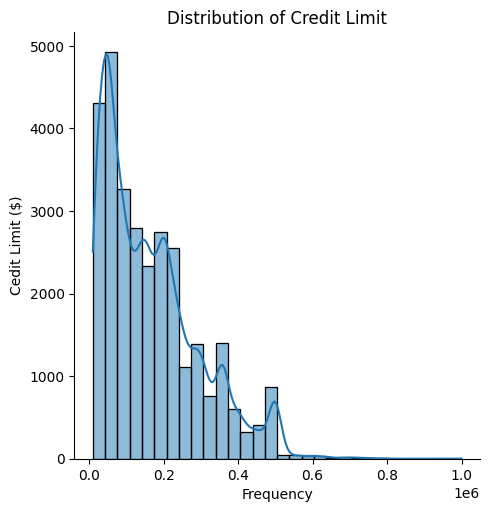

In [81]:
plt.figure(figsize=(12, 6))
sns.displot(df['limit_bal'], kde=True, bins=30)
plt.title('Distribution of Credit Limit')
plt.xlabel('Frequency')
plt.ylabel('Cedit Limit ($)')


/var/folders/dl/q12jywhx4svgdkc33pp48gq80000gn/T/ipykernel_15857/1187103355.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='limit_bal', data=df, palette='Set2')


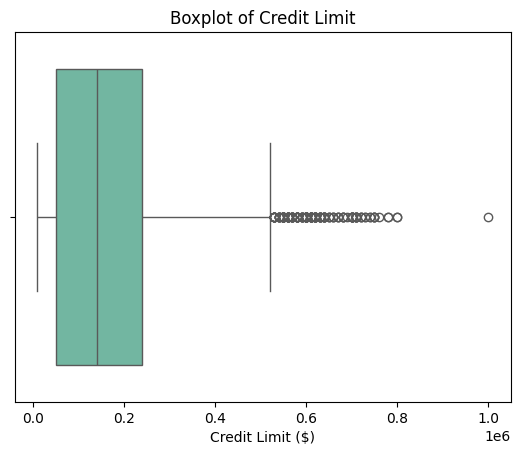

In [82]:
# Boxplot to visualize the distribution of credit limits 
sns.boxplot(x='limit_bal', data=df, palette='Set2')
plt.title('Boxplot of Credit Limit')
plt.xlabel('Credit Limit ($)')
plt.show()

In [83]:
def outliers(df, col):
    q1 = df[col].quantile(.25)
    q3 = df[col].quantile(.75)
    iqr = q3 - q1 

    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr

    ls = df.index[(df[col]<lower_bound)|(df[col]>upper_bound)]
    return ls

In [84]:
# Identify outliers in the 'limit_bal' column. Individuals with credit limits outside the IQR range are considered outliers.
# These outliers may represent individuals with unusually high or low credit limits.
# This can be useful for understanding the distribution of credit limits and identifying potential anomalies in the dataset
# The outliers can be further investigated to understand their impact on the analysis or model performance.
outliers_list = outliers(df, 'limit_bal')
df.iloc[outliers_list]

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
ID,,,,,,,,,,,,,,,,,,,,,
14,70000,1,2,2,30,1,2,2,0,0,...,66782,36137,36894,3200,0,3000,3000,1500,0,1
435,360000,1,3,1,55,0,0,0,0,0,...,1770,0,0,6015,17454,1775,0,0,0,0
453,260000,1,2,2,37,0,0,0,0,0,...,122388,127402,131074,14000,5022,130000,7000,6000,6000,0
529,360000,1,1,2,26,1,0,0,0,0,...,0,1677,2600,0,0,0,1685,2613,0,0
557,160000,2,1,1,33,0,0,0,0,0,...,350,150,199,5401,1829,350,150,199,1145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29573,210000,1,1,1,40,0,0,0,0,0,...,1967,3952,10330,326,3632,1967,3985,10330,8000,1
29742,100000,1,2,1,32,0,0,0,0,0,...,43360,41906,42831,2454,2700,1712,1500,1600,1600,0
29863,50000,1,2,1,38,0,0,0,0,0,...,4768,0,0,1200,1200,1020,0,0,7000,1


In [85]:
# Checking the default status of outliers to understand their impact on the target variable
# This will help in understanding if outliers are more likely to default or not
# Currently, 20% which is a significant proportion indicating the existence of a relationship between credit limit outliers and default status
df.iloc[outliers_list]['default'].value_counts(normalize=True) 

default
0    0.802395
1    0.197605
Name: proportion, dtype: float64

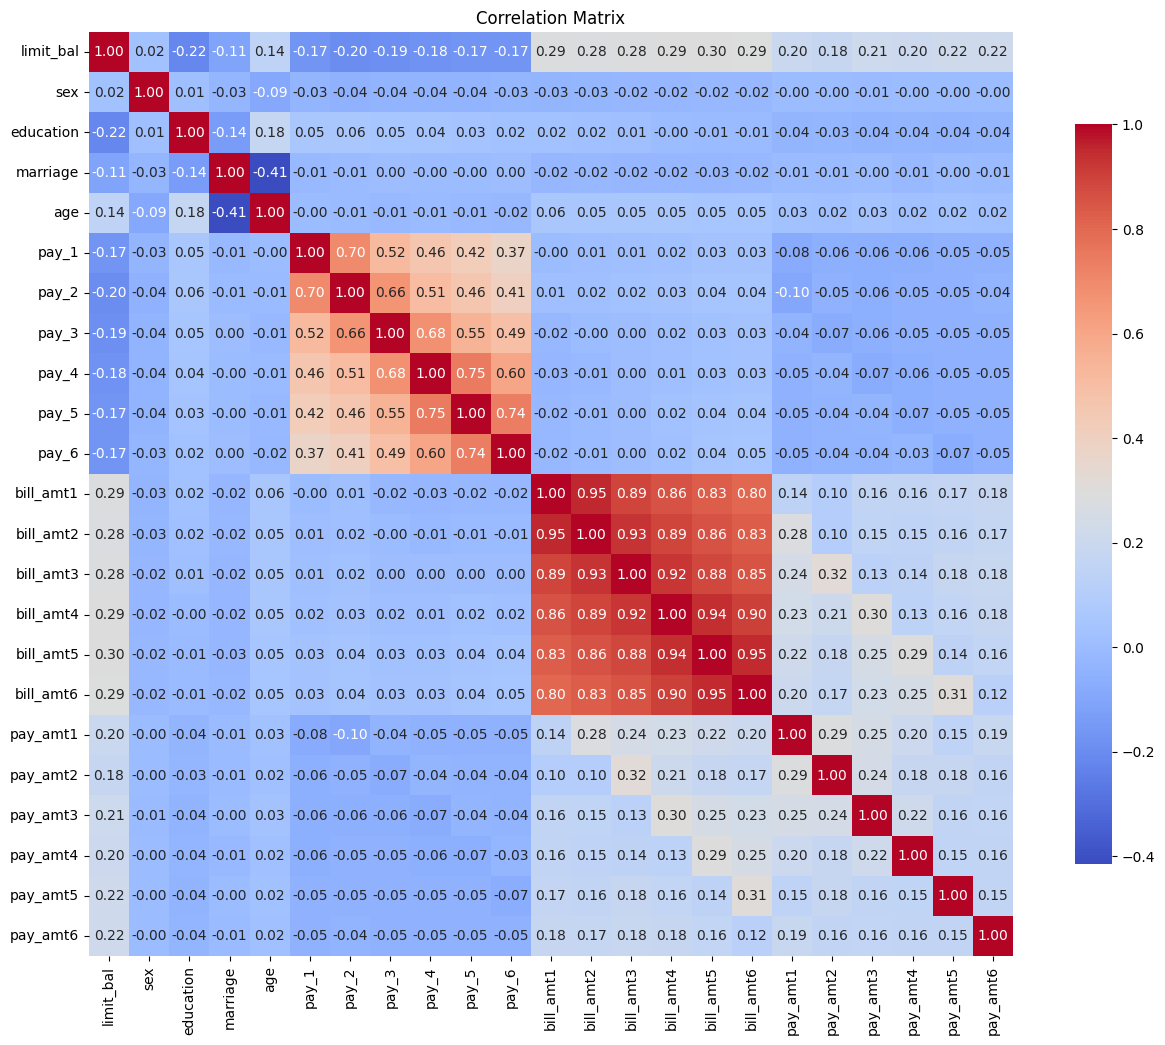

In [ ]:
# Calculate the correlation matrix excluding the target variable
# This will help in understanding the relationships between features
# In the Heatmap there's strong correlation for features 'pay_1' - 'pay_6' and 'bill_amt1' - 'bill_amt6'
# Suprisingly, limit balance has a relatively low correlation to the other features
corr = df.drop(columns=['default']).corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={'shrink': .8})
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Gathering all features with the highest correlation from the correlation matrix
# The process is the following:
# 1. Calculate the correlation matrix excluding the target variable.
df_corr = df.drop(columns=['default']).corr(method='pearson')

# 2. Unstack the correlation matrix to get pairs of features and their correlation values.
corr_pairs = df_corr.unstack()

# 3. Remove self-correlations (where a variable is correlated with itself).
corr_pairs = corr_pairs[corr_pairs < 1]

# 4. Drop duplicate pairs (e.g., if A is correlated with B, we only keep one of A-B or B-A).
corr_pairs = corr_pairs.drop_duplicates()

# 5. Filter for pairs with a high correlation value (e.g., greater than 0.5).
high_corr = corr_pairs[corr_pairs > 0.5].sort_values(ascending=False)

# 6. Reset the index for better readability and display.
high_corr_df = high_corr.reset_index()
high_corr_df.columns = ['Variable 1', 'Variable 2', 'Correlation']

unique_vars = pd.unique(
    np.concatenate([
    high_corr_df['Variable 1'].values,
    high_corr_df['Variable 2'].values
]))

feature_list = unique_vars.tolist()
feature_list.sort()
print(feature_list)

['bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
